<p>Analyst: John Paul R. Magculang - BSIT3A</p>

<h2>Import libraries</h2>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

<h2>Load the data [Dataset >> Dataframe]</h2>

In [2]:
internet = pd.read_csv('internet.csv')
internet

,Country Name,Country Code,Birth rate,Internet users,Income Group
0,Aruba,ABW,10.244,78.9,High income
1,Afghanistan,AFG,35.253,5.9,Low income
2,Angola,AGO,45.985,19.1,Upper middle income
3,Albania,ALB,12.877,57.2,Upper middle income
4,United Arab Emirates,ARE,11.044,88.0,High income
...,...,...,...,...,...
190,"Yemen, Rep.",YEM,32.947,20.0,Lower middle income
191,South Africa,ZAF,20.850,46.5,Upper middle income
192,"Congo, Dem. Rep.",COD,42.394,2.2,Low income
193,Zambia,ZMB,40.471,15.4,Lower middle income


<h2>Checking for null values</h2>

In [3]:
internet.isnull().sum()

Country Name      0
Country Code      0
Birth rate        0
Internet users    0
Income Group      0
dtype: int64

<h1>Changing data types "object" into Categorical</h1>

In [4]:
internet['Country Name'] = internet['Country Name'].astype('category')
internet['Income Group'] = internet['Income Group'].astype('category')

In [5]:
internet.dtypes

Country Name      category
Country Code        object
Birth rate         float64
Internet users     float64
Income Group      category
dtype: object

<hr>

<h1>1. Distribution of Birth Rates</h1>
<p>The histogram indicates that birth rates are predominantly clustered in the lower range (approximately 10-20), with a noticeable decline in frequency as birth rates increase, suggesting a right-skewed distribution where a larger number of countries have lower birth rates compared to those with higher rates.</p>

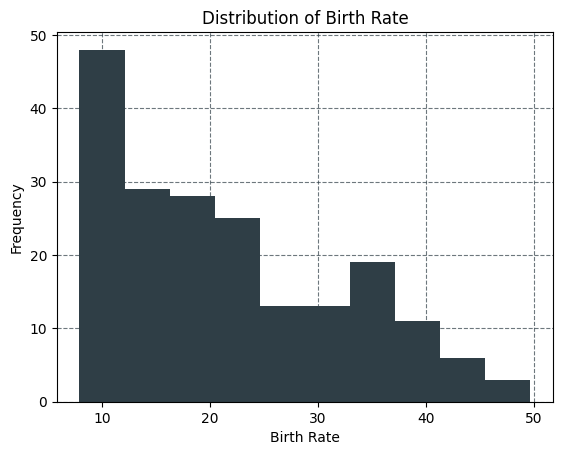

In [6]:
plt.hist(internet['Birth rate'],color='#2F3E46')
plt.grid(linestyle='--',alpha=0.7,color='#2F3E46')
plt.xlabel("Birth Rate")
plt.ylabel("Frequency")
plt.title("Distribution of Birth Rate")
plt.show()

<h1>2. Top 5 Countries with the Highest Internet Usage</h1>
<p>The line plot visually represents the top five countries with the highest internet usage, as identified by the code. While all exhibit exceptional internet penetration, a gradual downward trend is observed from Iceland to Denmark. This suggests that even within this group of digitally advanced nations, subtle variations in factors like infrastructure or demographics impact internet adoption. The consistent decline highlights the complexity of achieving truly universal internet access.</p>

In [7]:
b = internet.groupby('Country Name')['Internet users'].sum().reset_index()
b2 = b.sort_values(by='Internet users',ascending=False).head(5)
print(b2)

    Country Name  Internet users
79       Iceland         96.5468
19       Bermuda         95.3000
131       Norway         95.0534
167       Sweden         94.7836
48       Denmark         94.6297


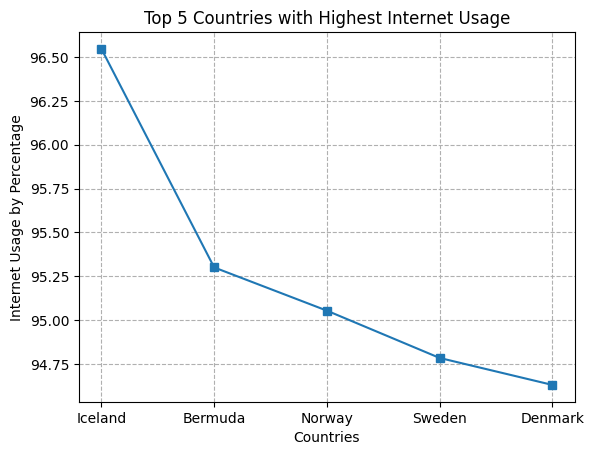

In [21]:
plt.plot(b2['Country Name'], b2['Internet users'],marker='s')
plt.xlabel('Countries')
plt.ylabel('Internet Usage by Percentage')
plt.title('Top 5 Countries with Highest Internet Usage')
plt.grid(linestyle='--')
plt.show()

<h1>3. Count of Countries by Income Group</h1>
<p>The bar chart shows that there are significantly more "High income" countries than any other income group. This suggests that globally, a larger portion of countries have reached higher income levels, likely due to factors like strong economies or access to global markets.  The "Low income" group, with the fewest countries, indicates significant development challenges exist for those nations.</p>

In [9]:
internet['Income Group'].value_counts()

Income Group
High income            67
Lower middle income    50
Upper middle income    48
Low income             30
Name: count, dtype: int64

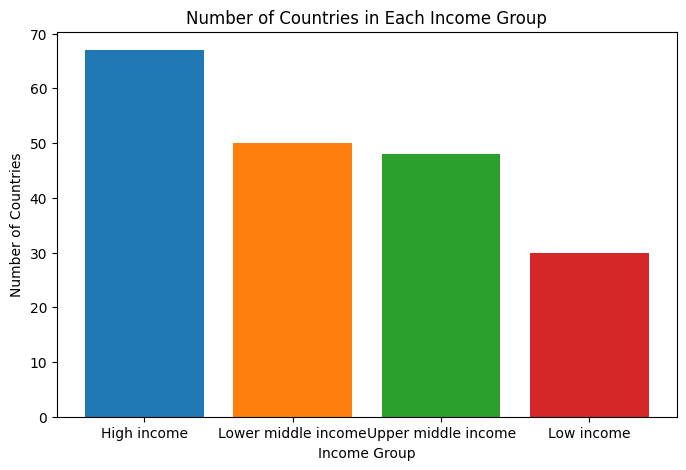

In [10]:
income_counts = internet["Income Group"].value_counts()

plt.figure(figsize=(8,5))
plt.bar(income_counts.index, income_counts.values, color=["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728"])

# Labels and title
plt.xlabel("Income Group")
plt.ylabel("Number of Countries")
plt.title("Number of Countries in Each Income Group")

plt.show()

<h1>4. Box plot of Internet Usage</h1>
<p>The boxplot illustrates a median internet usage of approximately 40%, with the middle 50% of the data ranging from about 15% to 65%. This indicates a significant spread in internet penetration across countries, with some exhibiting remarkably high usage, while nearly all have at least a minimal level.</p>

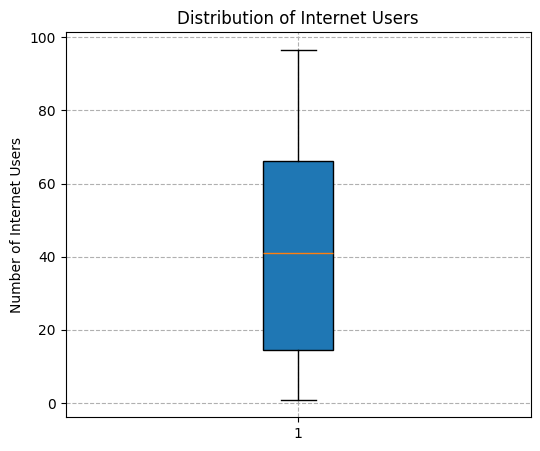

In [11]:
plt.figure(figsize=(6,5))
plt.boxplot(internet["Internet users"], vert=True, patch_artist=True, boxprops=dict(facecolor="#1f77b4"))

plt.ylabel("Number of Internet Users")
plt.title("Distribution of Internet Users")

plt.grid(linestyle='--')
plt.show()

<h1>5. Countries with No Internet Access</h1>
<p>After examining the data to find countries with no internet users, it was determined that every country in the dataset has at least some level of internet usage, implying a baseline level of internet adoption globally.</p>

In [12]:
noInternet = internet[internet['Internet users']==0]['Country Name']
noInternet.to_list()

[]

In [13]:
internet[internet['Internet users']==0]

,Country Name,Country Code,Birth rate,Internet users,Income Group


<h1>6. Average Birth Rate</h1>
<p>The calculated mean birth rate of 21.47 provides a central value for birth rates within the dataset, indicating that the typical country represented experiences a birth rate in the low-to-mid twenties. This average helps to contextualize individual country birth rates and allows for comparisons against global averages or regional trends.</p>

In [14]:
f = internet['Birth rate'].mean()
print(np.round(f,2))

21.47


<h1>7. Scatterplot: Birth Rate vs Internet Usage</h1>
<p>The scatterplot reveals a noticeable negative correlation between birth rate and internet usage. Countries with higher birth rates tend to have lower percentages of internet users, and conversely, countries with lower birth rates often exhibit higher internet usage. This suggests potential links between socioeconomic development, access to technology, and demographic trends.</p>

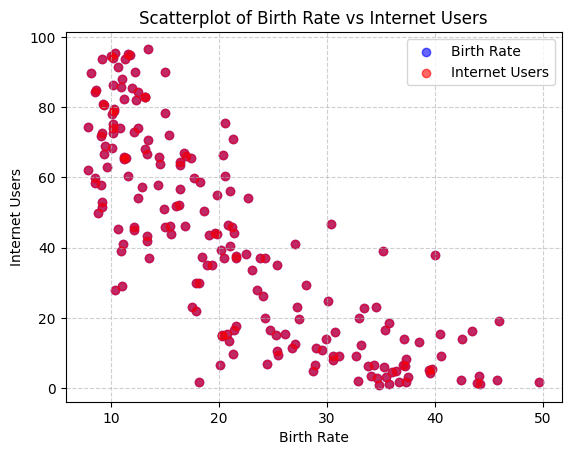

In [15]:
plt.scatter(internet['Birth rate'], internet['Internet users'], c="blue", label="Birth Rate", alpha=0.6)

plt.scatter(internet['Birth rate'], internet['Internet users'], c="red", label="Internet Users", alpha=0.6)

plt.xlabel('Birth Rate')
plt.ylabel('Internet Users')
plt.title('Scatterplot of Birth Rate vs Internet Users')

plt.legend()
plt.grid(linestyle='--',alpha=0.6)
plt.show()

<h1>8. Countries with Birth Rates Above 40</h1>
<p>The list of countries with birth rates above 40% reveals a concentration in sub-Saharan Africa, indicating a regional demographic trend characterized by high fertility. This pattern suggests potential challenges related to resource management, healthcare infrastructure, and educational access in these nations, as rapid population growth can strain existing systems</p>

In [16]:
h = internet[internet['Birth rate'] > 40][['Country Name','Birth rate']]
print(h)

         Country Name  Birth rate
2              Angola      45.985
11            Burundi      44.151
14       Burkina Faso      40.551
65        Gambia, The      42.525
115              Mali      44.138
127             Niger      49.661
128           Nigeria      40.045
156           Somalia      43.891
167              Chad      45.745
178            Uganda      43.474
192  Congo, Dem. Rep.      42.394
193            Zambia      40.471


<h1>9. Pie Chart of Income Groups</h1>
<p>The pie chart reveals that "High income" countries make up the largest portion (34.4%) of the dataset, suggesting a significant global presence of higher-income economies. Conversely, "Low income" countries represent the smallest portion (15.4%), indicating a lower representation and highlighting potential economic disparities.</p>

In [17]:
internet['Income Group'].value_counts()

Income Group
High income            67
Lower middle income    50
Upper middle income    48
Low income             30
Name: count, dtype: int64

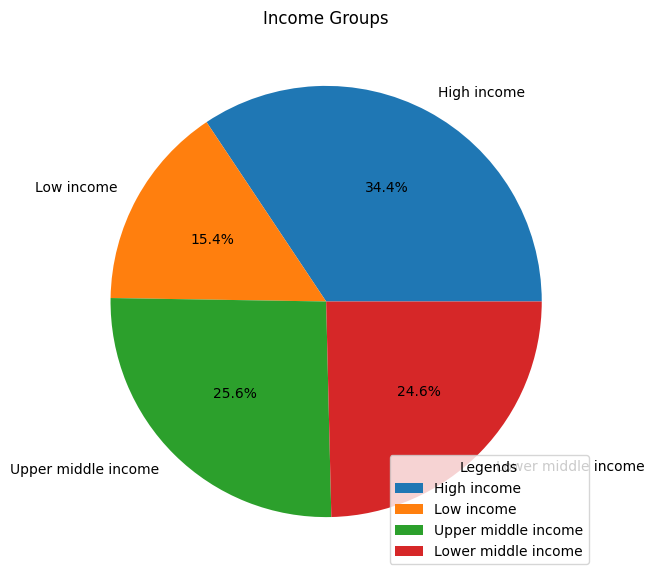

In [18]:
i = internet.groupby(['Income Group']).size()
plt.figure(figsize=(7,7))
plt.pie(i, autopct='%1.1f%%',labels=internet['Income Group'].unique())
plt.legend(title='Legends')
plt.title('Income Groups')
plt.show()

<h1>10. Correlation Between Birth Rate and Internet Usage</h1>
<p>
The correlation coefficient of -0.82 indicates a strong negative correlation between birth rate and internet usage. This means that as birth rates increase, internet usage tends to decrease, and vice versa. The strength of the correlation suggests a significant relationship between these two variables, implying potential socioeconomic factors that influence both birth rates and internet access.</p>

In [19]:
j = internet['Birth rate'].corr(internet['Internet users'])
print(np.round(j,2))

-0.82
